# MACD(Moving Average Convergence / Divergence )
MACD（Moving Average Convergence and Divergence) 是Geral Appel 于1979年提出的，利用收盘价的短期（常用为12日）指数移动平均线与长期（常用为26日）指数移动平均线之间的聚合与分离状况，对买进、卖出时机作出研判的技术指标。

In [1]:
##keep
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 加载贵州茅台股价数据

In [3]:
maotai = pd.read_csv('./datasets/maotai.csv', index_col=0, parse_dates=True)
maotai.head()

,symbol,volume,open,high,low,last,change,percent,turnover_rate
time,,,,,,,,,
2001-08-27,600519.SH,40631800,4.5550,4.9866,4.3359,4.6923,0.5490,13.25,56.83
2001-08-28,600519.SH,12964779,4.6183,4.8836,4.5682,4.8652,0.1727,3.68,18.13
2001-08-29,600519.SH,5325275,4.8810,4.8836,4.7649,4.8018,-0.0632,-1.30,7.45
2001-08-30,600519.SH,4801306,4.7886,4.9510,4.7517,4.8968,0.0951,1.98,6.72
2001-08-31,600519.SH,2323148,4.9034,4.9655,4.8572,4.8850,-0.0118,-0.24,3.25


## 取2020年1月1日开始的记录组成新的数据框

In [19]:
maotai2 = pd.DataFrame(maotai.loc['2020-01-01':])
maotai2.head()

,symbol,volume,open,high,low,last,change,percent,turnover_rate
time,,,,,,,,,
2020-01-02,600519.SH,14809916,1114.9550,1131.8177,1103.0938,1116.9319,-52.3854,-4.48,1.18
2020-01-03,600519.SH,13031878,1104.0822,1104.0822,1064.4460,1066.0868,-50.8192,-4.55,1.04
2020-01-06,600519.SH,6341478,1058.4758,1080.2609,1054.9570,1065.5234,-0.5330,-0.05,0.50
2020-01-07,600519.SH,4785359,1065.0390,1086.2904,1063.9518,1081.8721,16.3032,1.53,0.38
2020-01-08,600519.SH,2500825,1072.5017,1082.8309,1070.0603,1075.5560,-6.2746,-0.58,0.20


## 画出收盘价走势图

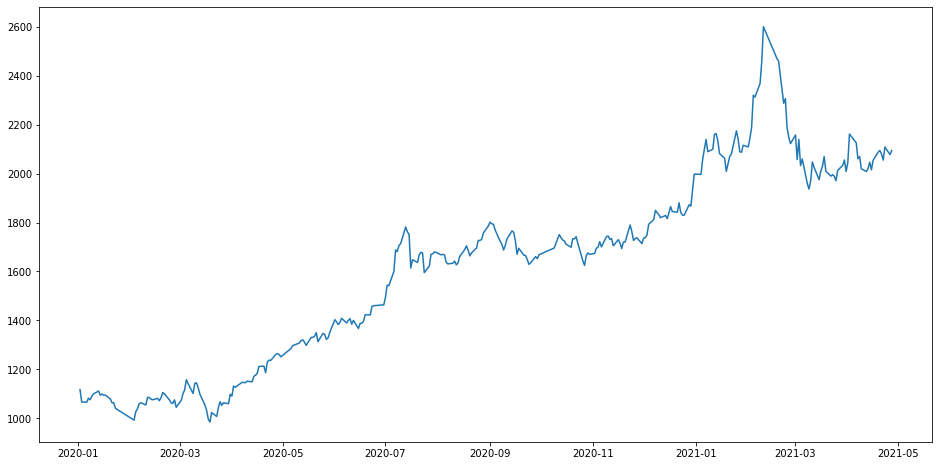

In [20]:
plt.figure(figsize=(16, 8))
plt.plot(maotai2['last'])
plt.show()

## 计算MACD和signal序列

In [21]:
short = maotai2['last'].ewm(span=12, adjust=False).mean()
long = maotai2['last'].ewm(span=26, adjust=False).mean()
macd = short - long
signal = macd.ewm(span=9, adjust=False).mean()

## 画出MACD指标图

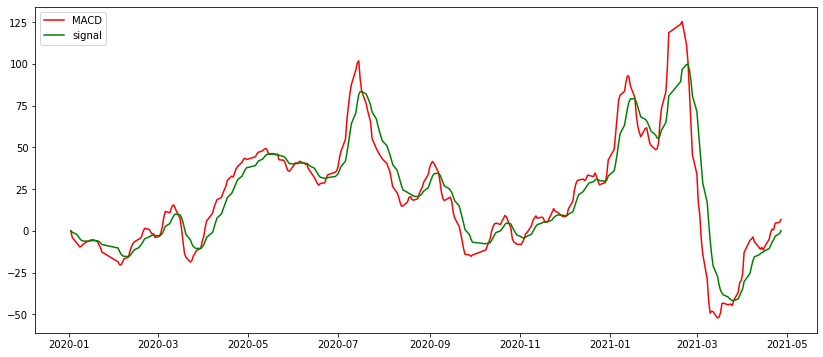

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(macd, 'r-', label='MACD')
plt.plot(signal, 'g-', label='signal')
plt.legend(loc='upper left')
plt.show()

## 将macd和signal序列添加到原来的数据框

In [23]:
maotai2['macd'] = macd
maotai2['signal'] = signal
maotai2.head()

,symbol,volume,open,high,low,last,change,percent,turnover_rate,macd,signal
time,,,,,,,,,,,
2020-01-02,600519.SH,14809916,1114.9550,1131.8177,1103.0938,1116.9319,-52.3854,-4.48,1.18,0.000000,0.000000
2020-01-03,600519.SH,13031878,1104.0822,1104.0822,1064.4460,1066.0868,-50.8192,-4.55,1.04,-4.056019,-0.811204
2020-01-06,600519.SH,6341478,1058.4758,1080.2609,1054.9570,1065.5234,-0.5330,-0.05,0.50,-7.232533,-2.095470
2020-01-07,600519.SH,4785359,1065.0390,1086.2904,1063.9518,1081.8721,16.3032,1.53,0.38,-8.334664,-3.343309
2020-01-08,600519.SH,2500825,1072.5017,1082.8309,1070.0603,1075.5560,-6.2746,-0.58,0.20,-9.607022,-4.596051


## 计算金叉与死叉

In [27]:
tf = macd > signal
post = tf.shift(-1)
gold = (tf != post) & tf
death = (tf != post) & post

In [28]:
sum(gold), sum(death)

(13, 13)

## 在收盘价趋势图上标识出金叉与死叉

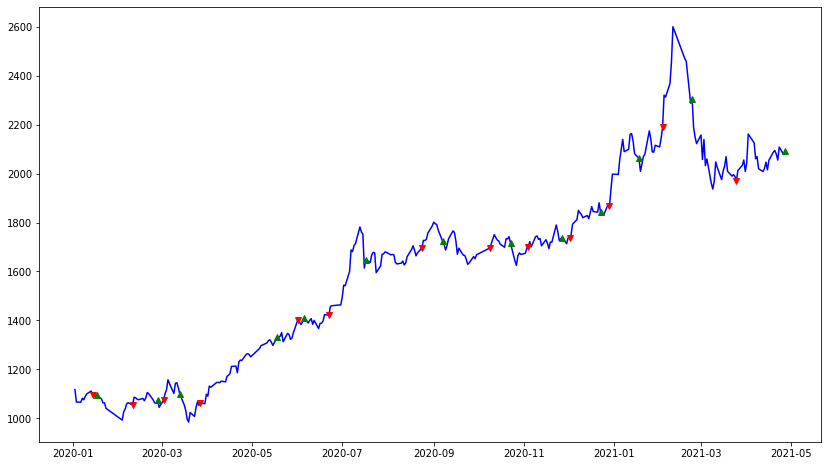

In [31]:
plt.figure(figsize=(14, 8))
plt.plot(maotai2['last'], 'b-')
plt.plot(maotai2.loc[gold, 'last'], 'g^', label='gold')
plt.plot(maotai2.loc[death, 'last'], 'rv', label='death')
plt.show()